## Data Analysis and Visualization

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('diamonds.csv')

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.shape

(53940, 11)

In [7]:
len(df['Unnamed: 0'].unique().tolist())

53940

In [8]:
df.rename(columns={'Unnamed: 0':'index'}, inplace=True)
df.set_index('index',inplace=True)

In [9]:
print(df.columns)
df.head()

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [11]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [12]:
df['Volume']=df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
index,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [13]:
df.drop(['x','y','z'],axis=1,inplace=True)

In [14]:
df[['carat','Volume','price']].corr()

,carat,Volume,price
carat,1.000000,0.976308,0.921591
Volume,0.976308,1.000000,0.902385
price,0.921591,0.902385,1.000000


In [15]:
df['clarity'].value_counts().to_frame()

,clarity
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [16]:
%%capture
! pip install seaborn

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0, 4)

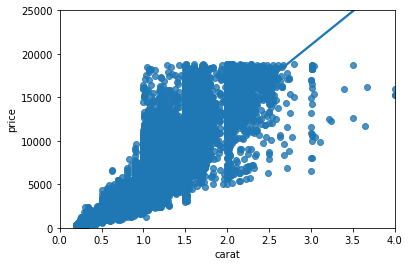

In [18]:
sns.regplot(x='carat',y='price',data=df)
plt.ylim(0,25000)
plt.xlim(0,4)

(0, 1000)

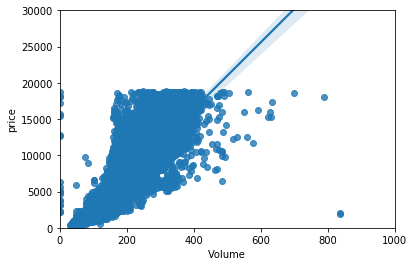

In [19]:
sns.regplot(x='Volume',y='price',data=df)
plt.ylim(0,30000)
plt.xlim(0,1000)

In [20]:
from scipy import stats

In [21]:
#Finding correlation between carat and price in the dataframe with pearsons coefficient and p-value

pearson_coef, p_value = stats.pearsonr(df['carat'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9215913011934769  with a P-value of P = 0.0


In [22]:
#Finding correlation between Volume and price in the dataframe with pearsons coefficient and p-value

pearson_coef, p_value = stats.pearsonr(df['Volume'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9023845363055313  with a P-value of P = 0.0


### Starting Linear Regression

In [24]:
#Collecting X and Y
X=df['carat'].values
Y=df['price'].values

In [36]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

n=len(X)

numerator=0
denominator=0
for i in range(n):
    numerator += (X[i]-mean_x)*(Y[i]-mean_y)
    denominator += (X[i]-mean_x)**2

m=numerator/denominator
c=mean_y-(m*mean_x)

print("m =",m,"  c =",c)

m = 7756.425617967361   c = -2256.360580044546


In [37]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred=m*X[i]+c
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print("R-Square value is",r2)

R-Square value is 0.8493305264354793


### Using Scikit Learn

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cannot use Rank 1 matrix in sklearn
X=X.reshape(n,1)

#Creating model
reg=LinearRegression()

#Fitting training data
reg=reg.fit(X,Y)

#Y Prediction
Y_pred=reg.predict(X)

#Calculating R2 Score
r2_score=reg.score(X,Y)

print("R-Square value is",r2_score)

R-Square value is 0.8493305264354857
